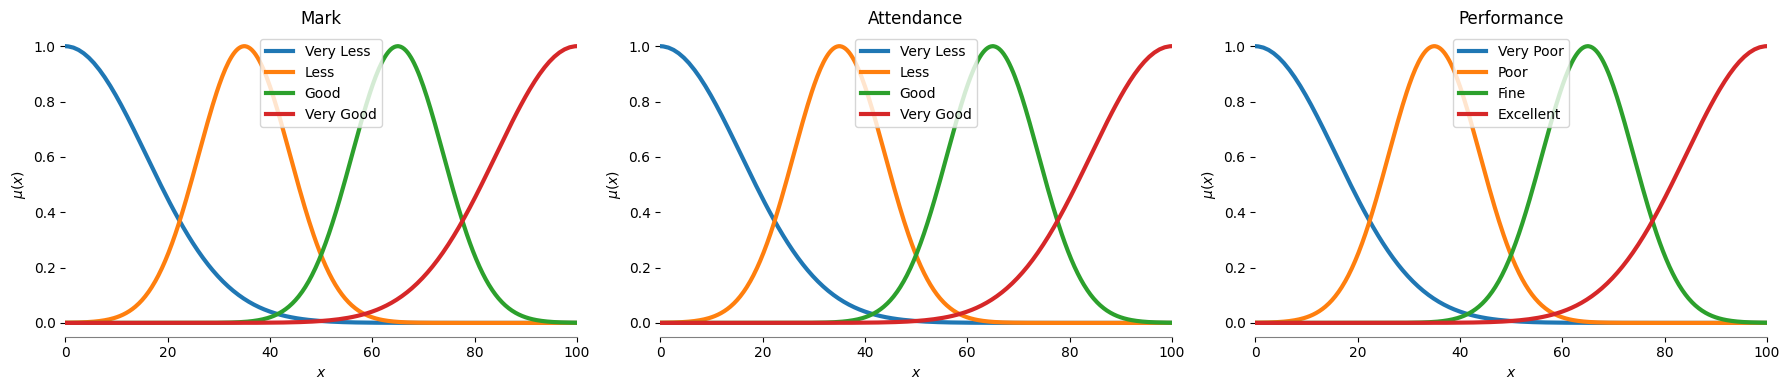

In [42]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.mf import MembershipFunction

mf = MembershipFunction(n_points=500)

variables = {
    "mark": FuzzyVariable(
        universe_range=(0, 100),
        terms={
            "Very Less": mf.gaussmf(center=0, sigma=250),
            "Less": mf.gaussmf(center=35, sigma=80),
            "Good": mf.gaussmf(center=65, sigma=80),
            "Very Good": mf.gaussmf(center=100, sigma=250),
        },
    ),
    "attendance": FuzzyVariable(
        universe_range=(0, 100),
        terms={
            "Very Less": mf.gaussmf(center=0, sigma=250),
            "Less": mf.gaussmf(center=35, sigma=80),
            "Good": mf.gaussmf(center=65, sigma=80),
            "Very Good": mf.gaussmf(center=100, sigma=250),
        },
    ),
    #
    "performance": FuzzyVariable(
        universe_range=(0, 100),
        terms={
            "Very Poor": mf.gaussmf(center=0, sigma=250),
            "Poor": mf.gaussmf(center=35, sigma=80),
            "Fine": mf.gaussmf(center=65, sigma=80),
            "Excellent": mf.gaussmf(center=100, sigma=250),
        },
    ),
}

plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
variables["mark"].plot()
plt.title("Mark")
plt.xlabel(r'$x$')
plt.ylabel(r'$\mu (x)$')
plt.xlim([0, 100])

plt.subplot(1, 3, 2)
variables["attendance"].plot()
plt.title("Attendance")
plt.xlabel(r'$x$')
plt.ylabel(r'$\mu (x)$')
plt.xlim([0, 100])

plt.subplot(1, 3, 3)
variables["performance"].plot()
plt.title("Performance")
plt.xlabel(r'$x$')
plt.ylabel(r'$\mu (x)$')
plt.xlim([0, 100])

plt.tight_layout()
plt.show()

In [43]:
from fuzzy_expert.rule import FuzzyRule

rules = [
    # Rule 1
    FuzzyRule(
        premise=[
            ("mark", "Very Less"),
            ("AND", "attendance", "Very Less"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
    
    # Rule 2
    FuzzyRule(
        premise=[
            ("mark", "Very Less"),
            ("AND", "attendance", "Less"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
    
    # Rule 3
    FuzzyRule(
        premise=[
            ("mark", "Less"),
            ("AND", "attendance", "Very Less"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
    
    # Rule 4
    FuzzyRule(
        premise=[
            ("mark", "Less"),
            ("AND", "attendance", "Less"),
        ],
        consequence=[("performance", "Poor")],
    ),
    
    # Rule 5
    FuzzyRule(
        premise=[
            ("mark", "Good"),
            ("AND", "attendance", "Good"),
        ],
        consequence=[("performance", "Fine")],
    ),
    
    
    # Rule 6
    FuzzyRule(
        premise=[
            ("mark", "Good"),
            ("AND", "attendance", "Very Good"),
        ],
        consequence=[("performance", "Fine")],
    ),
    
    # Rule 7
    FuzzyRule(
        premise=[
            ("mark", "Very Good"),
            ("AND", "attendance", "Good"),
        ],
        consequence=[("performance", "Fine")],
    ),
    
    
    # Rule 8
    FuzzyRule(
        premise=[
            ("mark", "Very Good"),
            ("AND", "attendance", "Very Good"),
        ],
        consequence=[("performance", "Excellent")],
    ),
    
    
    # Rule 9
    FuzzyRule(
        premise=[
            ("mark", "Good"),
            ("AND", "attendance", "Very Less"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
    
    # Rule 10
    FuzzyRule(
        premise=[
            ("mark", "Good"),
            ("AND", "attendance", "Less"),
        ],
        consequence=[("performance", "Poor")],
    ),
    
    
    # Rule 11
    FuzzyRule(
        premise=[
            ("mark", "Very Good"),
            ("AND", "attendance", "Less"),
        ],
        consequence=[("performance", "Poor")],
    ),
    
    # Rule 12
    FuzzyRule(
        premise=[
            ("mark", "Very Less"),
            ("AND", "attendance", "Good"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
    
    # Rule 13
    FuzzyRule(
        premise=[
            ("mark", "Less"),
            ("AND", "attendance", "Good"),
        ],
        consequence=[("performance", "Poor")],
    ),
    
    # Rule 14
    FuzzyRule(
        premise=[
            ("mark", "Very Less"),
            ("AND", "attendance", "Very Good"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
    
    # Rule 15
    FuzzyRule(
        premise=[
            ("mark", "Less"),
            ("AND", "attendance", "Very Good"),
        ],
        consequence=[("performance", "Poor")],
    ),
    
    # Rule 16
    FuzzyRule(
        premise=[
            ("mark", "Very Good"),
            ("AND", "attendance", "Very Less"),
        ],
        consequence=[("performance", "Very Poor")],
    ),
]

print('Fuzzy Rules for Assessing Students\' Performance')
for rule in rules:
    print(40*'-')
    print(rule)

Fuzzy Rules for Assessing Students' Performance
----------------------------------------
IF  mark IS Very Less
    AND attendance IS Very Less
THEN
    performance IS Very Poor
CF = 1.00
Threshold-CF = 0.00

----------------------------------------
IF  mark IS Very Less
    AND attendance IS Less
THEN
    performance IS Very Poor
CF = 1.00
Threshold-CF = 0.00

----------------------------------------
IF  mark IS Less
    AND attendance IS Very Less
THEN
    performance IS Very Poor
CF = 1.00
Threshold-CF = 0.00

----------------------------------------
IF  mark IS Less
    AND attendance IS Less
THEN
    performance IS Poor
CF = 1.00
Threshold-CF = 0.00

----------------------------------------
IF  mark IS Good
    AND attendance IS Good
THEN
    performance IS Fine
CF = 1.00
Threshold-CF = 0.00

----------------------------------------
IF  mark IS Good
    AND attendance IS Very Good
THEN
    performance IS Fine
CF = 1.00
Threshold-CF = 0.00

----------------------------------------
I

In [44]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="prod",
    or_operator="max",
    implication_operator="Rc", # Lukasiewicz's relation
    composition_operator="max-prod",
    production_link="max",
    defuzzification_operator="cog",
)

Student's Programming Performance: 36.04%


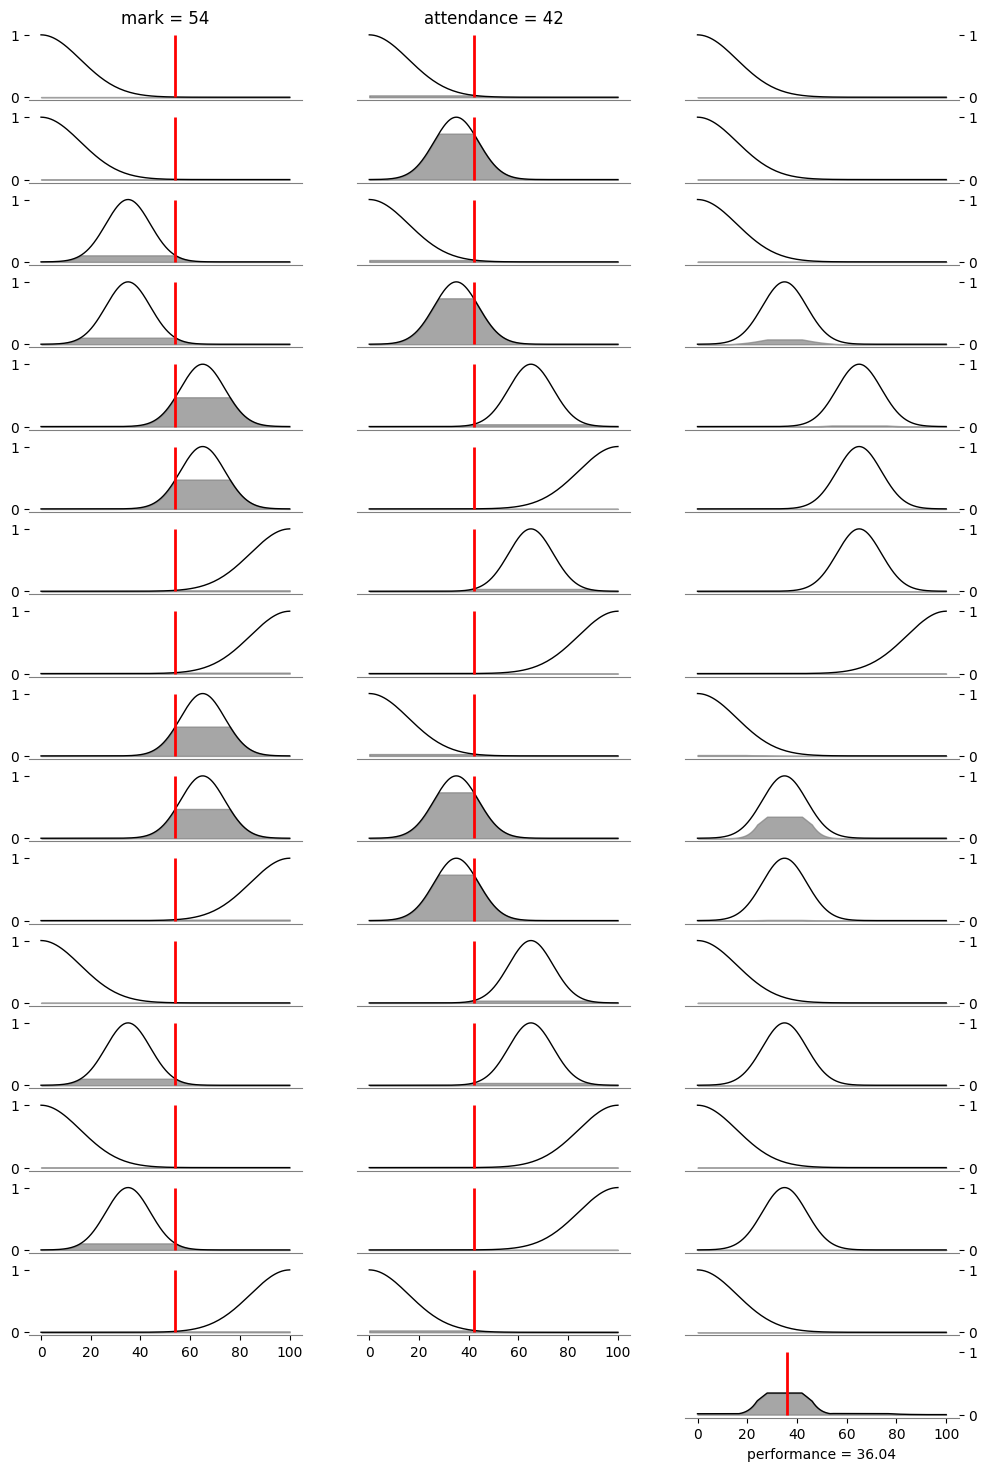

In [45]:
mark = 54
attendance = 42

output = model(
    variables=variables,
    rules=rules,
    mark=mark,
    attendance=attendance,
)

print(f"Student's Programming Performance: {output[0]['performance'] :.2f}%")


plt.figure(figsize=(12, 18))
model.plot(
    variables=variables,
    rules=rules,
    mark=mark,
    attendance=attendance,
)

plt.savefig('./plots/test.png') 

In [46]:
# interactive demo

from ipywidgets import interact, widgets

def demo(mark, attendance):
    plt.figure(figsize=(12, 18))
    model.plot(
        variables=variables,
        rules=rules,
        mark=mark,
        attendance=attendance,
    )

interact(
    demo,
    mark=widgets.FloatText(value=54, min=0, max=100),
    attendance=widgets.FloatText(value=42, min=0, max=100),
)

interactive(children=(FloatText(value=54.0, description='mark'), FloatText(value=42.0, description='attendance…

<function __main__.demo(mark, attendance)>